In [279]:
# Imports, nothing to see here
import random
import math
import sys,os

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))
from spreadsheet.cell import Cell
from spreadsheet.arraySpreadsheet import ArraySpreadsheet
from spreadsheet.linkedlistSpreadsheet import LinkedListSpreadsheet
from spreadsheet.csrSpreadsheet import CSRSpreadsheet
from spreadsheet.baseSpreadsheet import BaseSpreadsheet
from time import perf_counter

In [280]:
def create_random_cells(density: int, max_col:int, max_row:int) -> list[Cell]:
    """
    num_cells: number of cells you want
    max_col: maximum number of columns you want in your spreadsheet
    max_row: maximum number of rows you want in your spreadsheet
    """
    num_cells = (density*max_col*max_row).__ceil__()
    lCells = []
    lCells.append(Cell((max_row-1),(max_col-1),round(random.uniform(0.1,9.9), ndigits=2)))
    for _ in range(num_cells):
        row = random.randint(0, max_col-1)
        col = random.randint(0, max_row-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        lCells.append(Cell(row, col, val))
    return lCells

def create_density(cells_to_generate:int, density:float):
    """
    percentage is a float of the percent of non-None cells you want, e.g. 0.1 represents 10% cells
    with non-None values.
    """
    max_rows = derive_size(cells_to_generate, density)
    max_cols = max_rows
    ret = []
    ret.append(Cell((max_rows-1),(max_cols-1),(round(random.uniform(0.1,9.9), ndigits=2))))
    cells_to_make = cells_to_generate-1
    while cells_to_make > 0:
        row = random.randint(0, max_cols-1)
        col = random.randint(0, max_rows-1)
        val = round(random.uniform(0.1,9.9), ndigits=2)
        ret.append(Cell(row, col,val))
        cells_to_make -=1
    return (ret, max_cols,max_rows)

def derive_size(cells_to_generate:int, density:float):
    # for some number of cells to generate and some density given, 
    #return the number of columns and rows needed for that density
    #so for 100 cells to generate at 0.1 density, we should have a max of  32ish rows and columns
    inv_density = 1/density
    dimension = math.sqrt(cells_to_generate*inv_density).__ceil__()
    return dimension

def write_to_file(cells_to_generate:int, max_col:int, max_row:int):
    file = open("sample_data.txt","w")
    file.write(create_random_cells(cells_to_generate, max_col, max_row))
    file.close()

def display_array(array: ArraySpreadsheet):
    arr =array.array 
    for x in arr:
        for y in x:
            if(y.val == None):
                print("("+str(y.row),str(y.col)+" N)", end = " ")
            else:
                print(y, end = " ")
        print() #newline
    print("finished")

def get_lCells()->list[Cell]:
    """
    basically read from the file and create a list of cells from the data from the file
    """
    try:
        lcells = []
        dataFile = open("sample_data.txt", 'r')
        for line in dataFile:
            values = line.split()
            currRow = int(values[0])
            currCol = int(values[1])
            currVal = float(values[2])
            currCell = Cell(currRow, currCol, currVal)
            # each line contains a cell
            lcells.append(currCell)
        dataFile.close()
        return lcells
    except FileNotFoundError as e:
        print("Data file doesn't exist.")

def set_up_cells(cells_to_generate, max_col, max_row):
    write_to_file(cells_to_generate, max_col, max_row)
    return get_lCells()

def test_buildSpreadSheet(spreadSheet:BaseSpreadsheet,lCells:list[Cell]):
    start_time = perf_counter()
    spreadSheet.buildSpreadsheet(lCells)
    end_time = perf_counter()
    return end_time-start_time

def test_entries(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.entries()
    end_time = perf_counter()
    return end_time-start_time

def test_update(spreadSheet:BaseSpreadsheet, rowIndex: int, colIndex:int, val:float):
    start_time = perf_counter()
    spreadSheet.update(rowIndex, colIndex,val)
    end_time = perf_counter()
    return end_time-start_time

def test_append_row(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendRow()
    end_time = perf_counter()
    return end_time-start_time

def test_append_col(spreadSheet:BaseSpreadsheet):
    start_time = perf_counter()
    spreadSheet.appendCol()
    end_time = perf_counter()
    return end_time-start_time

def test_insert_row(spreadSheet:BaseSpreadsheet, rowIndex:int):
    start_time = perf_counter()
    spreadSheet.insertRow(rowIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_insert_col(spreadsheet:BaseSpreadsheet, colIndex:int):
    start_time = perf_counter()
    spreadsheet.insertCol(colIndex)
    end_time = perf_counter()
    return end_time-start_time

def test_find(spreadSheet:BaseSpreadsheet, value:float):
    start_time = perf_counter()
    spreadSheet.find(value)
    end_time = perf_counter()
    return end_time-start_time

def different_densities(cells_to_generate:int):
    low = random.uniform(0.01,0.3)
    med = random.uniform(0.31,0.60)
    high = random.uniform(0.61,0.99)
    densities = [low, med, high ]
    lCells_list = []
    for x in densities:
        lCells_list.append(create_density(cells_to_generate,x))
    return lCells_list


In [265]:
#arrays
#small
small_spreadsheets = []
for x in range(10):
    small_spreadsheets.append(ArraySpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(500, 0.1*x))
small_spreadsheets_tests =[]
small_spreadsheets_tests.append([test_buildSpreadSheet(small_spreadsheets[x], density[x][0])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_col(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_row(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_col(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_row(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_entries(small_spreadsheets[x])*1000 for x in range(10)]) 
small_spreadsheets_tests.append([test_find(small_spreadsheets[x],x)*1000 for x in range(10)]) 

df_small = pd.DataFrame(small_spreadsheets_tests)
df_small.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_small.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]

#medium
medium_spreadsheets = []
for x in range(10):
    medium_spreadsheets.append(ArraySpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(5000, 0.1*x))
medium_spreadsheets_tests =[]
medium_spreadsheets_tests.append([test_buildSpreadSheet(medium_spreadsheets[x], density[x][0])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_col(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_row(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_col(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_row(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_entries(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_find(medium_spreadsheets[x],x)*1000 for x in range(10)]) 



df_med = pd.DataFrame(medium_spreadsheets_tests)
df_med.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_med.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries" , "find"]
df_med


#large
large_spreadsheets = []

for x in range(10):
    large_spreadsheets.append(ArraySpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(10000, 0.1*x))
large_spreadsheets_tests =[]
large_spreadsheets_tests.append([test_buildSpreadSheet(large_spreadsheets[x], density[x][0])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_col(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_row(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_col(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_row(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_entries(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_find(large_spreadsheets[x],x)*1000 for x in range(10)]) 

df_large = pd.DataFrame(large_spreadsheets_tests)
df_large.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_large.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]
display(df_small)
display(df_med)
display(df_large)


,5041,2500,1681,1296,1024,841,729,625,576,529
build_spreadsheet,2.439417,1.370375,1.318250,0.787959,0.678041,0.608083,0.753416,0.518166,0.510375,0.495875
append_col,0.041834,0.016750,0.012875,0.010709,0.011792,0.009042,0.008250,0.007750,0.007916,0.007125
append_row,0.036875,0.017584,0.015125,0.012750,0.011875,0.010583,0.010041,0.009042,0.008709,0.008584
insert_col,0.898625,0.418000,0.227667,0.160041,0.125792,0.101500,0.122167,0.077875,0.072209,0.069000
insert_row,0.532542,0.262000,0.163500,0.129916,0.099625,0.077750,0.066000,0.054667,0.047625,0.209625
entries,1.500875,1.196833,1.078417,0.935750,1.061959,0.790917,0.742250,0.752500,0.693500,0.607667
find,0.748375,0.291958,0.238834,0.167750,0.130542,0.102416,0.085833,0.098625,0.067667,0.059583


,50176,25281,16900,12544,10000,8464,7225,6400,5625,5041
build_spreadsheet,20.449250,12.990916,9.768958,8.043125,6.510708,5.524167,5.161833,5.017375,4.584167,4.455417
append_col,0.204750,0.041750,0.048875,0.037292,0.031375,0.048584,0.236750,0.020208,0.019959,0.016125
append_row,321.230792,0.046417,0.045333,0.030792,0.027583,0.033875,0.023167,0.022083,0.020542,0.027334
insert_col,5.781250,3.316584,2.406042,1.497583,1.155000,0.969875,0.793250,0.687583,0.637334,0.529042
insert_row,4.223584,2.206375,2.071083,1.562709,0.848334,0.667542,0.582709,0.521458,0.423625,0.382500
entries,15.155334,12.601334,11.023750,10.312750,9.239500,8.763833,8.180750,7.797709,7.394250,7.292292
find,5.062458,2.647542,1.992292,1.533667,1.373583,0.947208,0.796541,0.768375,0.656209,0.609583


,100489,50176,33489,25281,20164,16900,14400,12544,11236,10000
build_spreadsheet,37.853750,21.510625,16.466500,13.958750,12.520167,13.071917,12.264125,11.306209,9.585833,8.664250
append_col,0.320000,0.079625,0.043917,0.048083,0.045833,0.042792,0.347208,0.035750,0.026125,0.028958
append_row,0.105292,0.060792,0.057667,0.043000,0.046375,0.035750,0.032417,0.038458,0.029125,0.027459
insert_col,11.086042,5.542667,3.774458,2.758875,2.158417,1.908334,1.613875,1.397000,1.187875,1.039208
insert_row,8.351792,3.852875,2.570125,1.894625,1.529416,1.423667,1.254958,1.014667,0.811000,0.732000
entries,30.583709,25.455792,22.833416,22.848417,20.049125,18.977166,18.863958,17.073208,16.289709,15.084000
find,9.139250,4.867166,3.162917,2.535542,2.287834,2.088958,1.884208,1.459125,1.188042,1.069959


In [277]:
ll = LinkedListSpreadsheet()
d = create_density(500, 0.1)
ll.buildSpreadsheet(d[0])


In [281]:
#linkedlist
#small
small_spreadsheets = []
for x in range(10):
    small_spreadsheets.append(LinkedListSpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(500, 0.1*x))
small_spreadsheets_tests =[]
small_spreadsheets_tests.append([test_buildSpreadSheet(small_spreadsheets[x], density[x][0])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_col(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_append_row(small_spreadsheets[x])*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_col(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_insert_row(small_spreadsheets[x], x)*1000 for x in range(10)])
small_spreadsheets_tests.append([test_entries(small_spreadsheets[x])*1000 for x in range(10)]) 
small_spreadsheets_tests.append([test_find(small_spreadsheets[x],x)*1000 for x in range(10)]) 

df_small = pd.DataFrame(small_spreadsheets_tests)
df_small.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_small.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]

#medium
medium_spreadsheets = []
for x in range(10):
    medium_spreadsheets.append(LinkedListSpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(5000, 0.1*x))
medium_spreadsheets_tests =[]
medium_spreadsheets_tests.append([test_buildSpreadSheet(medium_spreadsheets[x], density[x][0])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_col(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_append_row(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_col(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_insert_row(medium_spreadsheets[x], x)*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_entries(medium_spreadsheets[x])*1000 for x in range(10)])
medium_spreadsheets_tests.append([test_find(medium_spreadsheets[x],x)*1000 for x in range(10)]) 



df_med = pd.DataFrame(medium_spreadsheets_tests)
df_med.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_med.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries" , "find"]
df_med


#large
large_spreadsheets = []

for x in range(10):
    large_spreadsheets.append(LinkedListSpreadsheet())
density = []
for x in range(1,11):
    density.append(create_density(10000, 0.1*x))
large_spreadsheets_tests =[]
large_spreadsheets_tests.append([test_buildSpreadSheet(large_spreadsheets[x], density[x][0])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_col(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_append_row(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_col(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_insert_row(large_spreadsheets[x], x)*1000 for x in range(10)])
large_spreadsheets_tests.append([test_entries(large_spreadsheets[x])*1000 for x in range(10)])
large_spreadsheets_tests.append([test_find(large_spreadsheets[x],x)*1000 for x in range(10)]) 

df_large = pd.DataFrame(large_spreadsheets_tests)
df_large.columns = [str(density[x][1]*density[x][2]) for x in range(density.__len__())]
df_large.index = ["build_spreadsheet","append_col", "append_row", "insert_col", "insert_row","entries", "find"]
display(df_small)
display(df_med)
display(df_large)


TypeError: unsupported format string passed to NoneType.__format__

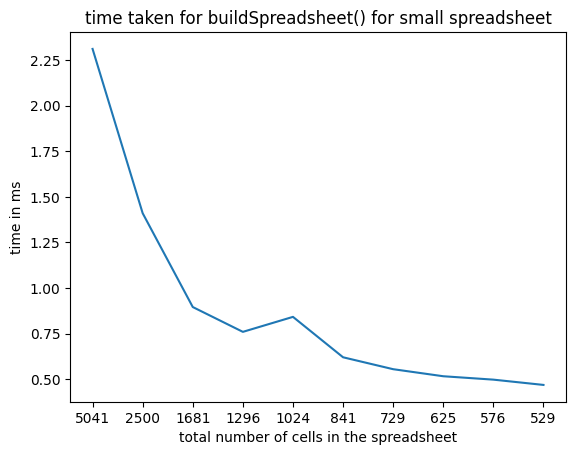

In [245]:
plt.xlabel("total number of cells in the spreadsheet")
plt.title("time taken for buildSpreadsheet() for small spreadsheet")
plt.ylabel("time in ms")
plt.plot( df_small.iloc[0])

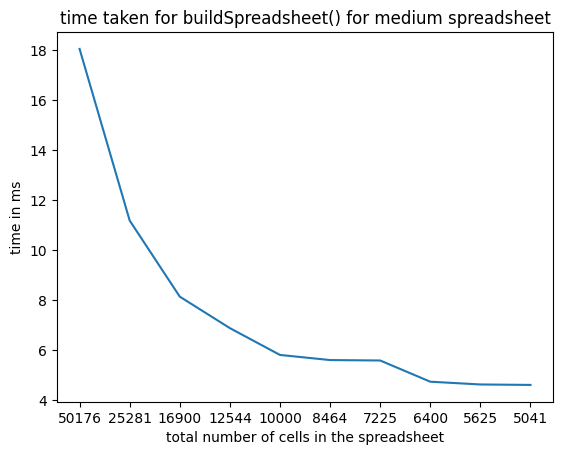

In [246]:
plt.xlabel("total number of cells in the spreadsheet")
plt.title("time taken for buildSpreadsheet() for medium spreadsheet")
plt.ylabel("time in ms")
plt.plot(df_med.iloc[0])


plt.show()

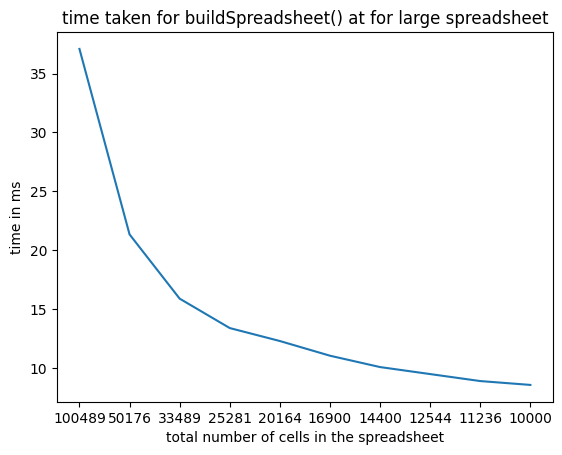

In [247]:
plt.xlabel("total number of cells in the spreadsheet")
plt.title("time taken for buildSpreadsheet() at for large spreadsheet")
plt.ylabel("time in ms")
plt.plot(df_large.iloc[0])